# Testing different OHM bond schedules
- Experiment 1: Same total amount of bond face value, either same amount of value for bonds with different start dates, or with more values for bonds started earlier)
- Experiment 2: Same total amount of bond face value, equal amount for different tenors or the same

# Experiment 1

In [43]:
from model.utility.default_parameters import default_params1 as params
from model.signals.bond_signals import total_value_bond_creation
number_runs = 2
number_steps = 100

bond1 = total_value_bond_creation(start_dates= [10,30,50], simulation_timesteps=number_steps, bond_tenors=30, total_face_value=6e6,bond_value_distribution=[])
bond2 = total_value_bond_creation(start_dates= [10,30,50], simulation_timesteps=number_steps, bond_tenors=30, total_face_value=6e6,bond_value_distribution=[3,1,1])
params.update({'bond_create_schedule':[bond1,bond2]})


In [44]:
from model.utility.default_initial_state import default_initial_state1 as initial_state
# Fill in the initial state
from model.utility.initial_state_functions import fill_in_initial_state
initial_state = fill_in_initial_state(initial_state, params)

from model.run import load_config, run, post_processing
# Load the experiment
exp = load_config(number_runs, params, initial_state, number_steps)

# Run the experiment
raw = run(exp)

# Parse the raw data
df = post_processing(raw)


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

cadCAD Version: 0.4.28
Execution Mode: local_proc
Simulation Dimensions:
Entire Simulation: (Models, Unique Timesteps, Params, Total Runs, Sub-States) = (1, 100, 20, 4, 67)
     Simulation 0: (Timesteps, Params, Runs, Sub-States) = (100, 20, 4, 67)
Execution Method: local_simulations
Execution Mode: parallelized
Total execution time: 21.64s


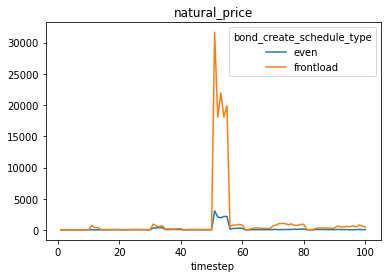

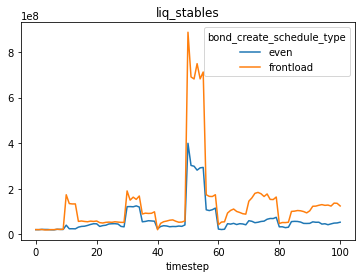

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

In [45]:
from model.utility.visualization import plot_all_sims,plot_grouped_variables_average,plot_multivars_grouped_average
df["bond_create_schedule_type"] = ["even"]*number_runs*(number_steps+1) +  ["frontload"]*number_runs*(number_steps+1)
plot_grouped_variables_average([ "natural_price","liq_stables"],
                               ["bond_create_schedule_type"],
                               df)

# Experiment 2

In [5]:
from model.utility.default_parameters import default_params1 as params
from model.signals.bond_signals import total_value_bond_creation
number_runs = 2
number_steps = 100

bond1 = total_value_bond_creation(start_dates= 5, simulation_timesteps=number_steps, bond_tenors=[30,60,90], total_face_value=3e6,bond_value_distribution=[])
bond2 = total_value_bond_creation(start_dates= 5, simulation_timesteps=number_steps, bond_tenors=[30,60,90], total_face_value=3e6,bond_value_distribution=[3,2,1])
params.update({'bond_create_schedule':[bond1,bond2]})

In [6]:
from model.utility.default_initial_state import default_initial_state1 as initial_state
# Fill in the initial state
from model.utility.initial_state_functions import fill_in_initial_state
initial_state = fill_in_initial_state(initial_state, params)

from model.run import load_config, run, post_processing
# Load the experiment
exp = load_config(number_runs, params, initial_state, number_steps)

# Run the experiment
raw = run(exp)

# Parse the raw data
df = post_processing(raw)


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

cadCAD Version: 0.4.28
Execution Mode: local_proc
Simulation Dimensions:
Entire Simulation: (Models, Unique Timesteps, Params, Total Runs, Sub-States) = (1, 100, 20, 4, 67)
     Simulation 0: (Timesteps, Params, Runs, Sub-States) = (100, 20, 4, 67)
Execution Method: local_simulations
Execution Mode: parallelized
Total execution time: 20.58s


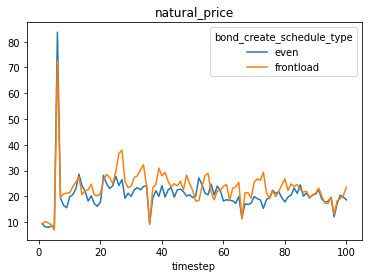

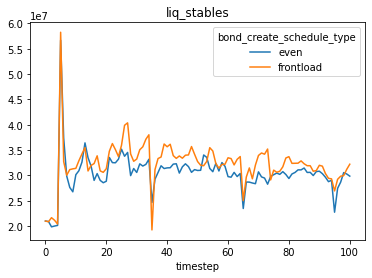

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

In [7]:
from model.utility.visualization import plot_all_sims,plot_grouped_variables_average,plot_multivars_grouped_average
df["bond_create_schedule_type"] = ["even"]*number_runs*(number_steps+1) +  ["frontload"]*number_runs*(number_steps+1)
plot_grouped_variables_average([ "natural_price","liq_stables"],
                               ["bond_create_schedule_type"],
                               df)